# Overview of ARIMA models
----------------------------------------------

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
from scipy.ndimage.interpolation import shift
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


In [131]:
from statsmodels.graphics.api import qqplot

In [6]:
xs=np.array([1,2,3,4,5])
shift(xs,-1)

array([2, 3, 4, 5, 0])

Test para probar actualizacion de datos

# AR-2 simulation

$$r_{t}= \phi_0+\phi_1\, r_{t-1} + \phi_2\, r_{t-2} +a_t,$$  donde $a_t:$ white noise


In [74]:
nstep = 1000
paths = 5
phi0 = 0
phi1 = 0.2
phi2 =  0.4
rt = np.random.randn(nstep, paths)
at = np.random.randn(nstep, paths)*0.2 # white noise
sumt = np.zeros((nstep, paths))
for i in range(nstep-2):
    rt[i+2] = phi0 + phi1*rt[i+1] +phi2*rt[i] + at[i+2] 
    sumt[i+1] = sumt[i]+rt[i+2] 
#plt.plot(rt[:,1])


In [75]:
rtp = pd.DataFrame(rt)
atp = pd.DataFrame(at)

## Checking autocorrelation

Time series rpt[]

In [77]:
autocorr = np.array([rtp[2].autocorr(lag=i) for i in range(10) ])

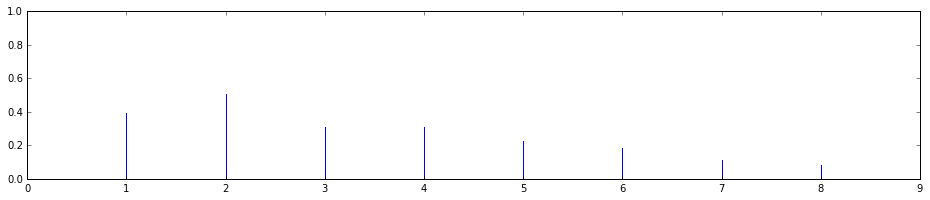

In [78]:
# Autocorrelation according to Pandas
plt.figure(figsize=(16,3))
plt.stem(autocorr, markerfmt=' ')
plt.show()

In [79]:
# Autocorrelation according to Statsmodels
tsa = sm.tsa
tsa.acf(rtp[2], nlags=10)

array([ 1.        ,  0.39238268,  0.50612317,  0.30484332,  0.30603142,
        0.221203  ,  0.17995827,  0.10977101,  0.08291312,  0.03219815,
        0.01732576])

In [84]:
sm.stats.durbin_watson(rtp[2])

1.195950589073723

Ljung--Box test

In [81]:
sm.stats.diagnostic.acorr_ljungbox(rtp[2], 4)

(array([ 154.42652219,  411.61387685,  505.00936931,  599.22878693]),
 array([  1.86860594e-035,   4.16085234e-090,   3.91792403e-109,
          2.27578898e-128]))

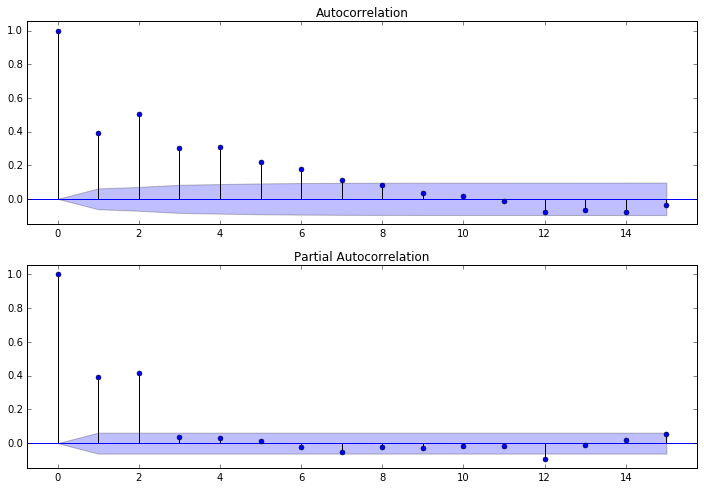

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(rtp[2].squeeze(), lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(rtp[2], lags=15, ax=ax2)

# AR Model

In [89]:
#linear regression
AR2 = sm.tsa.ARMA(rt[:,2], (2,0)).fit()
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 213.089
Method:                       css-mle   S.D. of innovations              0.195
Date:                Sun, 11 Sep 2016   AIC                           -418.177
Time:                        19:07:47   BIC                           -398.546
Sample:                             0   HQIC                          -410.716
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0218      0.018     -1.246      0.213        -0.056     0.013
ar.L1.y        0.2287      0.029      7.916      0.000         0.172     0.285
ar.L2.y        0.4196      0.029     14.519      0.000         0.363     0.476
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2951           +0.0000j            1.2951            0.0000
AR.2           -1.8401           +0.0000j            1.8401            0.5000
-----------------------------------------------------------------------------
"""

## Analyzing the Residuals

In [126]:
residuals = AR2.resid

In [128]:
# small p-values indicates that the data is not normally distributed
stats.normaltest(residuals)

NormaltestResult(statistic=1.375918609677024, pvalue=0.50260067802501274)

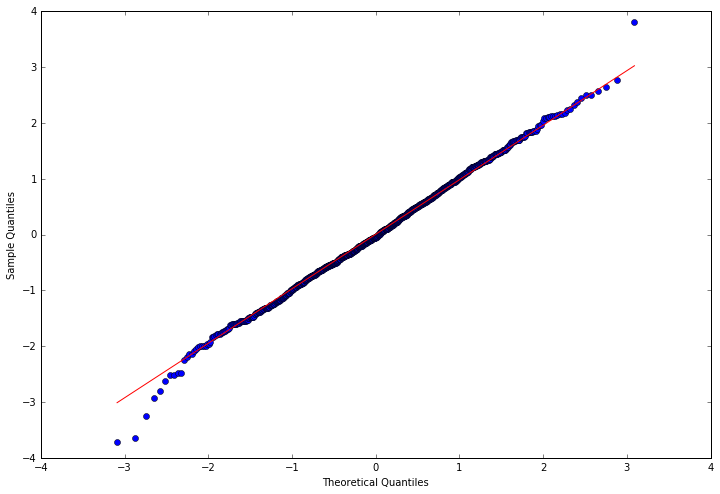

In [132]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(residuals, line='q', ax=ax, fit=True)

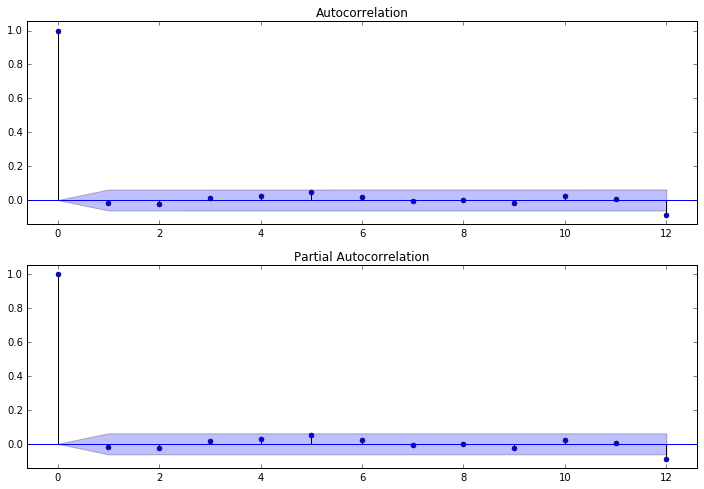

In [135]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(residuals, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(residuals, lags=12, ax=ax2)

In [157]:
# Notice that the p-values for the Ljung–Box Q test above .05 
# indicate “significance.” This is not a desirable result. 

r,q,p = sm.tsa.acf(residuals, qstat=True)
nlags = 15
data = np.c_[range(1,nlags), r[1:nlags], q[1:nlags], p[1:nlags]]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

            AC          Q  Prob(>Q)
lag                                
1.0  -0.017913   1.014751  0.602074
2.0  -0.026270   1.228553  0.746165
3.0   0.014585   1.912935  0.751768
4.0   0.026082   4.192762  0.522010
5.0   0.047580   4.575412  0.599302
6.0   0.019483   4.636772  0.704191
7.0  -0.007798   4.636785  0.795597
8.0  -0.000115   5.066116  0.828507
9.0  -0.020606   5.744272  0.836271
10.0  0.025885   5.815920  0.885360
11.0  0.008409  13.857385  0.309908
12.0 -0.089046  16.894153  0.204188
13.0 -0.054693  18.471498  0.186142
14.0 -0.039397  18.928294  0.217002


## Predictions

In [176]:
ini, fin = 2, 50
reference = range(ini, fin+1)
predictions = AR2.predict(ini, fin, dynamic=False)
print predictions

[-0.29693672 -0.05707272 -0.170747    0.05060521  0.05870672  0.01077896
  0.00766273  0.06990346  0.17157903  0.0189241   0.08663484  0.09337739
  0.13629724 -0.03165882 -0.0738893  -0.16255029 -0.22940987 -0.03215191
  0.12379606  0.21721991  0.13122322  0.11761053  0.07218761  0.05590247
 -0.14681077 -0.20802315 -0.1149661  -0.0724927  -0.18949135 -0.33058249
 -0.2393936  -0.25287973 -0.31564297 -0.27588454 -0.28586649 -0.21444567
 -0.14250517 -0.02067626  0.04426202 -0.004366   -0.01368732 -0.0598781
 -0.0497992   0.10612154 -0.05924716  0.07285725 -0.07535016  0.05857253
  0.16569774]


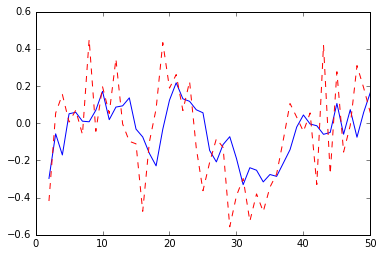

In [178]:
#ax =range(2,5).plot(figsize=(12,8))
plt.plot( reference, predictions);
plt.plot( reference, rt[ini:fin+1,2],'r--' );
#ax.legend();
#ax.axis((-20.0, 38.0, -4.0, 200.0));

In [122]:
pm = AR2.params
td= rt[0:3,2]
def pred(x,y):
    return pm[0]+ pm[1]*y+ pm[2]*x  

In [123]:
pred(td[0], td[1])

-0.31109125425966838

In [115]:
print td

[-0.74941376  0.1102569  -0.41827977]


In [119]:
pred(td[0], td[1])
AR2.predict(2,3)


array([-0.29693672, -0.05707272])